## Assignment: $k$ Means Clustering

### `! git clone https://www.github.com/ds4e/clustering`

### **Do Q1 and one other question.**

**Q1.** This is a question about clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

In [306]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?

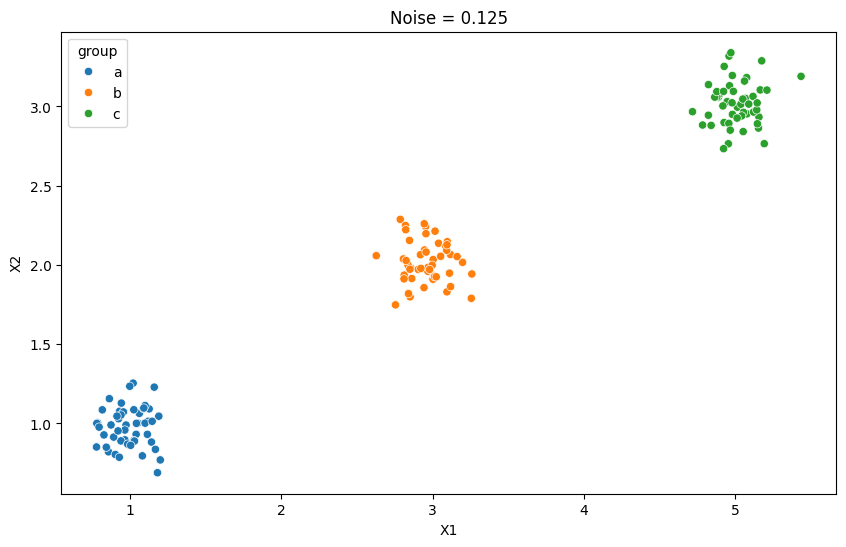

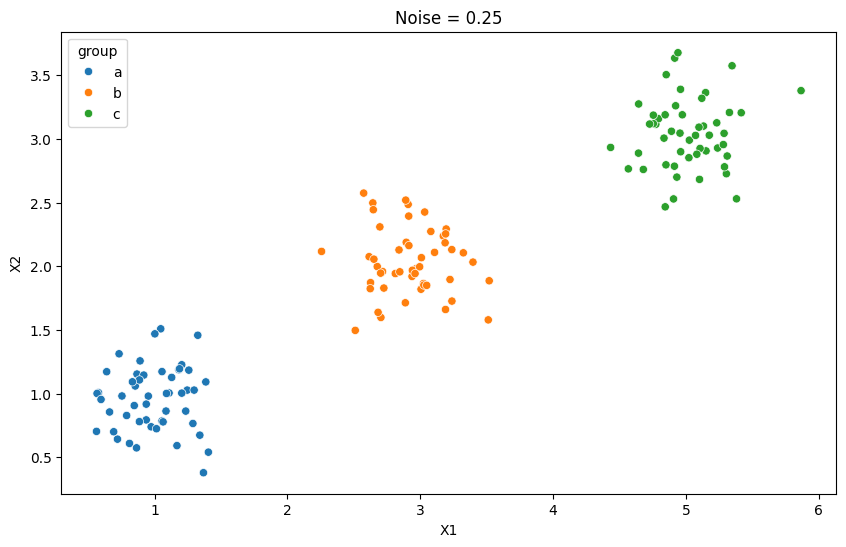

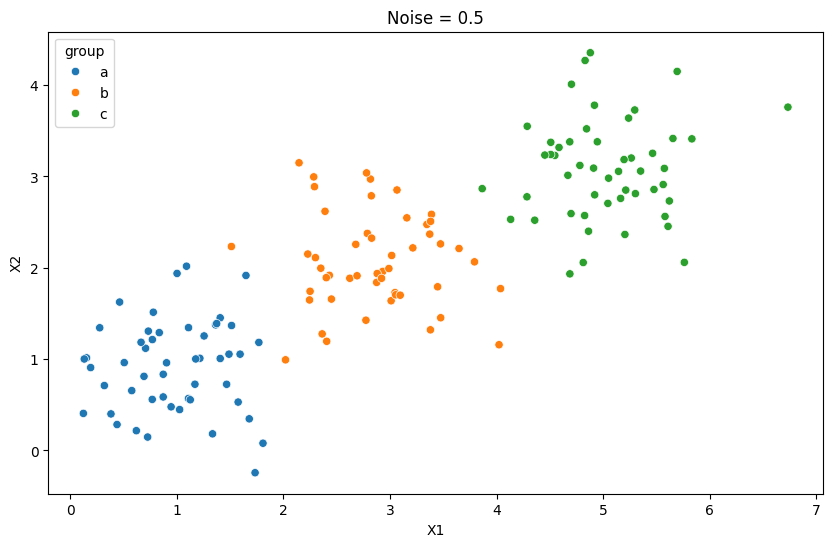

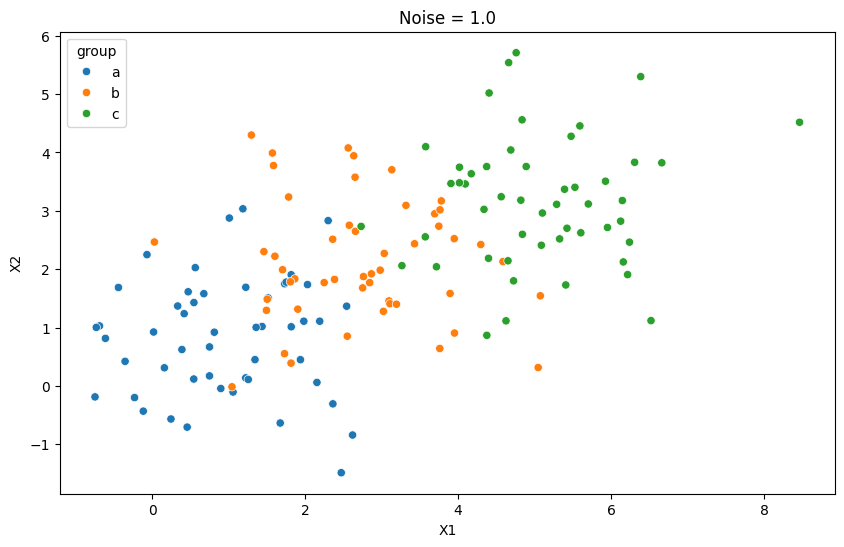

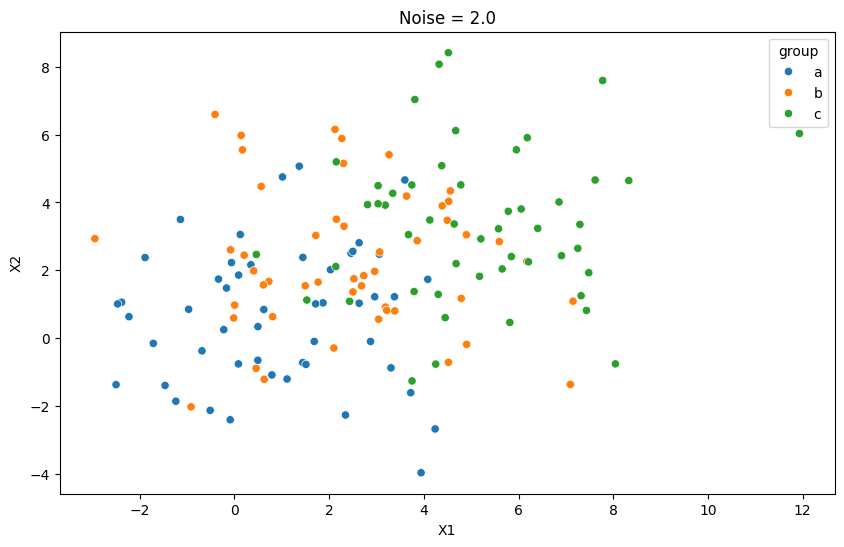

In [307]:
dfs = [df0_125, df0_25, df0_5, df1_0, df2_0]
noises = [0.125, 0.25, 0.5, 1.0, 2.0]

for df, noise in zip(dfs, noises):
    plt.figure(figsize = (10, 6))
    sns.scatterplot(x = df['x1'], y = df['x2'], hue = df['group'])
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.title(f"Noise = {noise}")
    plt.show()

# As the noise goes up, the clusters spread out further from their center,
# and at the end, the clusters have so much spread the individual groups are no longer apparent

3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$. (Pay attention to the vertical axis across plots, or put all the scree curves on a single canvas.)

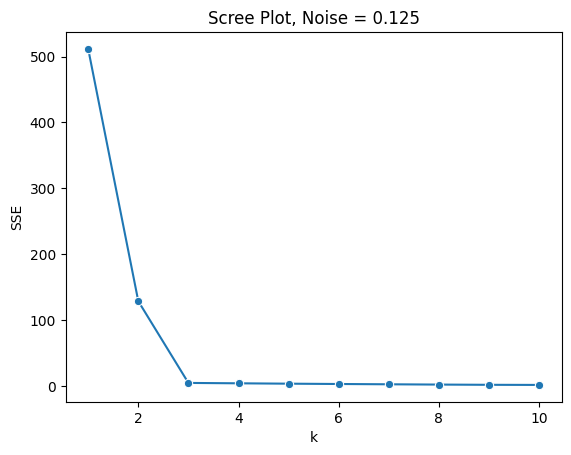

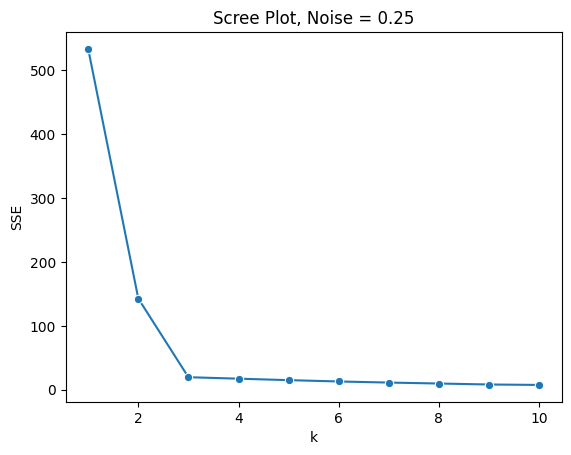

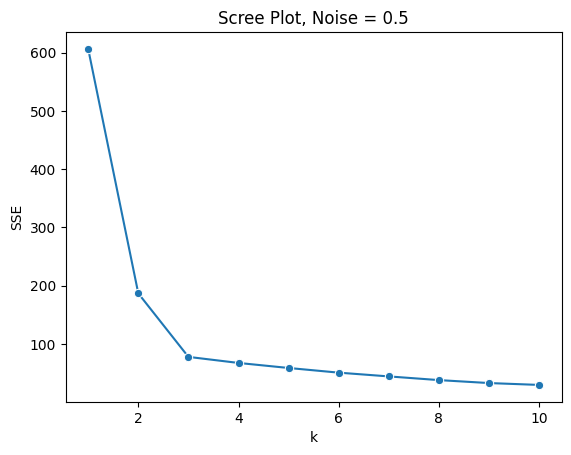

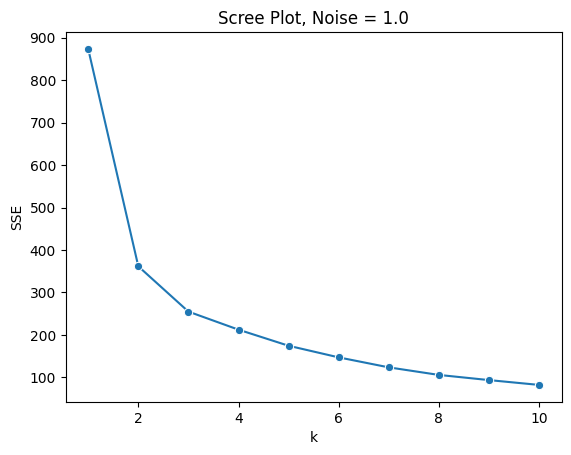

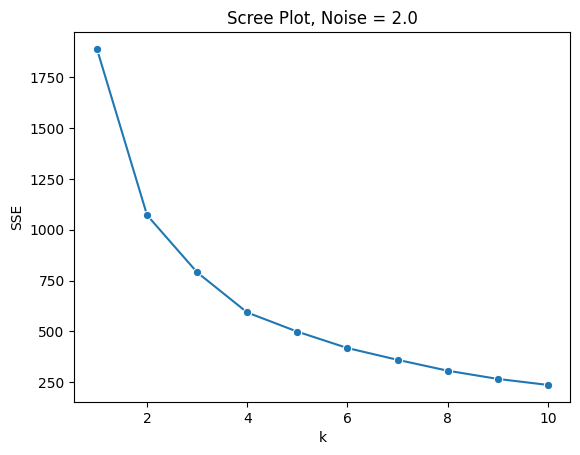

In [308]:
from sklearn.cluster import KMeans

for df, noise in zip(dfs, noises):
    X = df.loc[:, ['x1', 'x2']]
    k_bar = 10
    SSE = []
    for k in range(k_bar):
        model = KMeans(n_clusters = k + 1, max_iter = 300, n_init = 10, random_state = 42)
        model = model.fit(X)
        SSE.append(model.inertia_)
    plt.figure()
    scree_plot = sns.lineplot(x = np.arange(1, k_bar + 1), y = SSE, marker = 'o').set_title(f'Scree Plot, Noise = {noise}')
    plt.ylabel("SSE")
    plt.xlabel('k')
    plt.show()

4. Explain the intuition of the elbow, using this numerical simulation as an example.

The scree plot shows the SSE calculated for different numbers of clusters. By looking at where the "elbow" of the plot is, in other words where the plot begins to flatten out, we can see where increasing the number of clusters begins to have diminishing effects. Looking at the numerical simulation above, we see that for lower noise values, the "elbow" is at k = 3, which is the correct number of groups actually in our data. As the noise increase, the "elbow" k-value increases, and the model is less accurate in determining the number of groups in the data, as we would expect due to the noise.

**Q2.** This question is a case study on clustering.

1. Load the `2022 election cycle fundraising.csv` file in the `./data` folder. This has campaign finance data for the 2022 election for House and Senate candidates. We're going to focus on the total amount they raised, `Raised`, the total amount they spent, `Spent`, their available `Cash on Hand`, and their `Debts`. The variables denominated in dollars are messy and require cleaning. How do you handle it?

In [309]:
df = pd.read_csv("./data/2022 election cycle fundraising.csv")

# Getting rid of dollar signs and commas
for col in df[['Raised', 'Spent', 'Cash on Hand', 'Debts']]:
    df[col] = df[col].str.replace("$", "")
    df[col] = df[col].str.replace(",", "")
    df[col] = pd.to_numeric(df[col], errors = "coerce")

df.head()

,index,Member,Party,State,Chamber,Raised,Spent,Cash on Hand,Debts
0,0,Abigail Spanberger,Democratic,Virginia,House,7719396,7449678,851851,0
1,1,Adam Kinzinger,Republican,Illinois,House,2192741,1243502,2472888,0
2,2,Adam Schiff,Democratic,California,House,20993041,13957854,20942888,0
3,3,Adam Smith,Democratic,Washington,House,1211111,1173466,623472,0
4,4,Adrian Smith,Republican,Nebraska,House,1617611,1664674,1098579,0


2. Max-min normalize `Raised` and `Spent`. Use a scree plot to determine the optimal number of clusters for the $k$ means clustering algorithm. Make a scatter plot of `Raised` against `Spent` and hue the dots by their cluster membership. What do you see? Which politicians comprise the smallest two clusters? If necessary, look up some of these races to see how close they were.

In [310]:
def maxmin(x):
    x = (x - min(x)) / (max(x) - min(x))
    return x


X = df.loc[:, ["Spent", "Raised"]]
X = X.apply(maxmin)
X.head()

,Spent,Raised
0,0.098074,0.103512
1,0.016371,0.040686
2,0.183753,0.254404
3,0.015449,0.029527
4,0.021915,0.034148


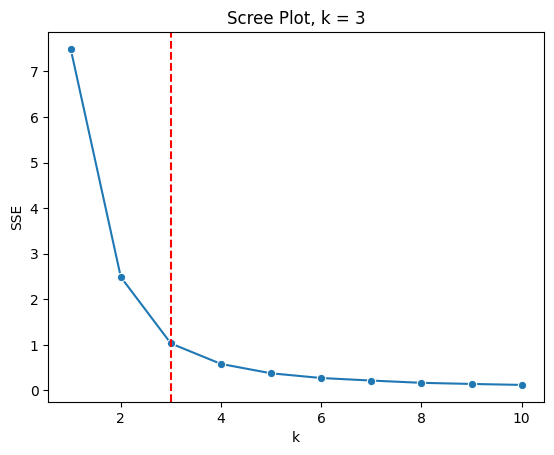

In [311]:
k_bar = 10
SSE = []
for k in range(k_bar):
    model = KMeans(n_clusters = k + 1, max_iter = 300, n_init = 10, random_state = 42)
    model = model.fit(X)
    SSE.append(model.inertia_)

plt.figure()
scree_plot = sns.lineplot(x = np.arange(1, k_bar + 1), y = SSE, marker = "o").set_title("Scree Plot, k = 3")
plt.xlabel("k")
plt.ylabel("SSE")
plt.axvline(x = 3, color = "red", linestyle = "--")
plt.show()

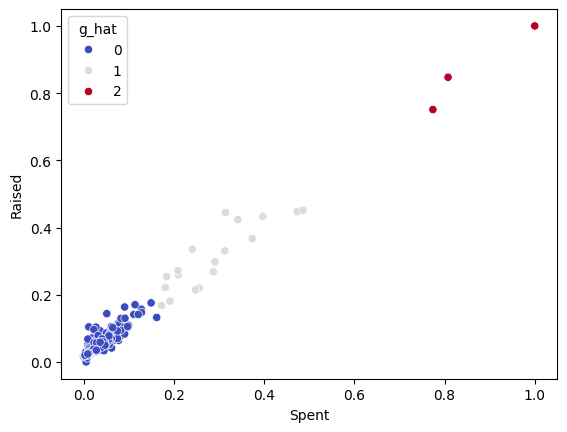

In [312]:
kstar = 3
model = KMeans(n_clusters = kstar, max_iter = 300, n_init = 10, random_state = 42)
model = model.fit(X)
g_hat = model.predict(X)
df['g_hat'] = g_hat
plt.figure()
sns.scatterplot(data = X, x = "Spent", y = "Raised", hue = df["g_hat"], palette = "coolwarm")
plt.show()

# I see three fairly distinct groups
# The first two groups are not especially far from one another,
# both mostly below 0.5 of the maxmin normalization of both Raised and Spent.
# The third group, however, is very distinct from the other two,
# with very high values of both spent and raised

In [313]:
df.loc[g_hat == 2, :]

# All 3 are democrat candidates, and all 3 are in competitive states

# Kelly won 51.39% to 46.51%
# Warnock won 51.40% to 48.49%
# Demings lost 57.68% to 41.27% (she was running for Senate, not House, data is mislabeled)

,index,Member,Party,State,Chamber,Raised,Spent,Cash on Hand,Debts,g_hat
340,340,Mark Kelly,Democratic,Arizona,Senate,73140886,61357281,13186127,0,2
417,417,Raphael Warnock,Democratic,Georgia,Senate,86581469,75959810,22762985,0,2
523,523,Val Demings,Democratic,Florida,House,64682883,58806664,6647641,0,2


In [314]:
df.loc[g_hat == 1, :]

,index,Member,Party,State,Chamber,Raised,Spent,Cash on Hand,Debts,g_hat
2,2,Adam Schiff,Democratic,California,House,20993041,13957854,20942888,0,1
87,87,Catherine Cortez Masto,Democratic,Nevada,Senate,37993811,35928936,5089745,0,1
89,89,Chuck Schumer,Democratic,New York,Senate,35899966,25944350,20231213,0,1
115,115,Dan Crenshaw,Republican,Texas,House,14535870,14512435,1876149,0,1
261,261,John Kennedy,Republican,Louisiana,Senate,28119082,18276565,15530074,0,1
290,290,Katie Porter,Democratic,California,House,21441693,15946876,15762568,0,1
298,298,Kevin McCarthy,Republican,California,House,24791538,22086344,7507326,0,1
326,326,Maggie Hassan,Democratic,New Hampshire,Senate,30914830,28380992,4813508,0,1
328,328,Marco Rubio,Republican,Florida,Senate,36709285,30153111,9631856,0,1
357,357,Michael Bennet,Democratic,Colorado,Senate,18086343,13713611,4898614,374819,1


3. Repeat part 2, but for `Cash on Hand` and `Debts`. Compare your results with part 2. Why might this be? If necessary, look up some of these races to see how close they were.

In [315]:
X = df.loc[:, ["Cash on Hand", "Debts"]]
X = X.apply(maxmin)
X.head()

,Cash on Hand,Debts
0,0.040154,0.0
1,0.111166,0.0
2,0.920268,0.0
3,0.030150,0.0
4,0.050962,0.0


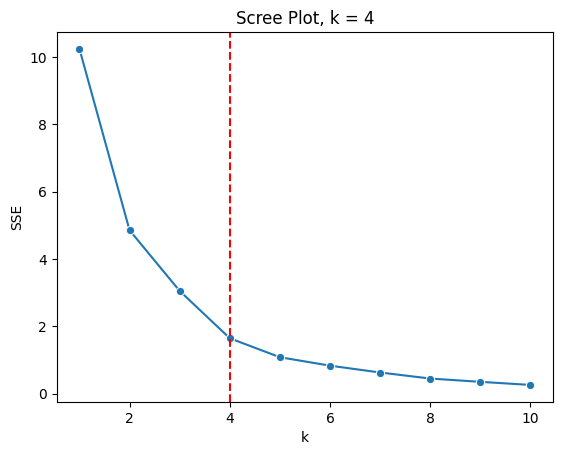

In [316]:
k_bar = 10
SSE = []
for k in range(k_bar):
    model = KMeans(n_clusters = k + 1, max_iter = 300, n_init = 10, random_state = 42)
    model = model.fit(X)
    SSE.append(model.inertia_)

plt.figure()
scree_plot = sns.lineplot(x = np.arange(1, k_bar + 1), y = SSE, marker = "o").set_title("Scree Plot, k = 4")
plt.xlabel("k")
plt.ylabel("SSE")
plt.axvline(x = 4, color = "red", linestyle = "--")
plt.show()

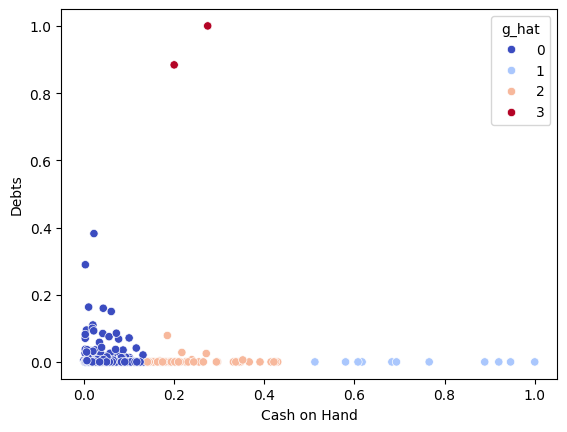

In [317]:
kstar = 4
model = KMeans(n_clusters = kstar, max_iter = 300, n_init = 10, random_state = 42)
model = model.fit(X)
g_hat = model.predict(X)
df['g_hat'] = g_hat
plt.figure()
sns.scatterplot(data = X, x = "Cash on Hand", y = "Debts", hue = df["g_hat"], palette = "coolwarm")
plt.show()

# I see that most of the politicians have extremely low debts, with 2 having much higher ones, forming their own group (group 3)
# There is also a distinction in cash on hand between groups 0, 1, and 2

In [318]:
df.loc[g_hat == 3, :]

# Ron Johnson and David Trone are in significant debt

# Trone won 54.75% to 45.15%
# Johnson won 50.41% to 49.41%

,index,Member,Party,State,Chamber,Raised,Spent,Cash on Hand,Debts,g_hat
133,133,David Trone,Democratic,Maryland,House,12990741,6878050,6206371,13302000,3
442,442,Ron Johnson,Republican,Wisconsin,Senate,27680901,23731653,4508581,11759857,3


In [319]:
df.loc[g_hat == 1, :]

# These politicians have $$$

,index,Member,Party,State,Chamber,Raised,Spent,Cash on Hand,Debts,g_hat
2,2,Adam Schiff,Democratic,California,House,20993041,13957854,20942888,0,1
89,89,Chuck Schumer,Democratic,New York,Senate,35899966,25944350,20231213,0,1
261,261,John Kennedy,Republican,Louisiana,Senate,28119082,18276565,15530074,0,1
267,267,John Thune,Republican,South Dakota,Senate,6770674,2763217,17419927,0,1
274,274,Josh Gottheimer,Democratic,New Jersey,House,7720264,2045198,14024163,0,1
290,290,Katie Porter,Democratic,California,House,21441693,15946876,15762568,0,1
310,310,Lindsey Graham,Republican,South Carolina,Senate,6695582,5371524,13815515,0,1
340,340,Mark Kelly,Democratic,Arizona,Senate,73140886,61357281,13186127,0,1
412,412,Raja Krishnamoorthi,Democratic,Illinois,House,7843935,4638387,11633394,0,1
417,417,Raphael Warnock,Democratic,Georgia,Senate,86581469,75959810,22762985,0,1


4. Use $k$ means clustering with all four numeric variables. How do your results compare to the previous two parts?

In [320]:
X = df.loc[:, ["Spent", "Raised", "Cash on Hand", "Debts"]]
X = X.apply(maxmin)
X.head()

,Spent,Raised,Cash on Hand,Debts
0,0.098074,0.103512,0.040154,0.0
1,0.016371,0.040686,0.111166,0.0
2,0.183753,0.254404,0.920268,0.0
3,0.015449,0.029527,0.030150,0.0
4,0.021915,0.034148,0.050962,0.0


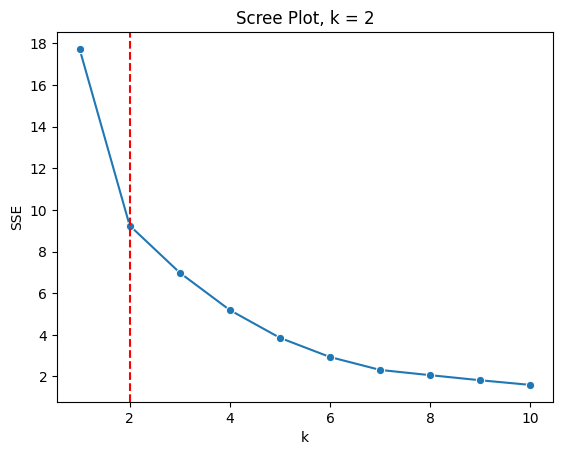

In [321]:
k_bar = 10
SSE = []
for k in range(k_bar):
    model = KMeans(n_clusters = k + 1, max_iter = 300, n_init = 10, random_state = 42)
    model = model.fit(X)
    SSE.append(model.inertia_)

plt.figure()
scree_plot = sns.lineplot(x = np.arange(1, k_bar + 1), y = SSE, marker = "o").set_title("Scree Plot, k = 2")
plt.xlabel("k")
plt.ylabel("SSE")
plt.axvline(x = 2, color = "red", linestyle = "--")
plt.show()

In [322]:
kstar = 2
model = KMeans(n_clusters = kstar, max_iter = 300, n_init = 10, random_state = 42)
model = model.fit(X)
g_hat = model.predict(X)
df['g_hat'] = g_hat

In [323]:
df.loc[g_hat == 0, :].head(5)

,index,Member,Party,State,Chamber,Raised,Spent,Cash on Hand,Debts,g_hat
0,0,Abigail Spanberger,Democratic,Virginia,House,7719396,7449678,851851,0,0
1,1,Adam Kinzinger,Republican,Illinois,House,2192741,1243502,2472888,0,0
3,3,Adam Smith,Democratic,Washington,House,1211111,1173466,623472,0,0
4,4,Adrian Smith,Republican,Nebraska,House,1617611,1664674,1098579,0,0
5,5,Adriano Espaillat,Democratic,New York,House,1178693,888437,392705,0,0


In [324]:
df.loc[g_hat == 0, :]["Chamber"].value_counts()

Chamber
House     422
Senate     92
Name: count, dtype: int64

In [325]:
df.loc[g_hat == 1, :].head(5)

,index,Member,Party,State,Chamber,Raised,Spent,Cash on Hand,Debts,g_hat
2,2,Adam Schiff,Democratic,California,House,20993041,13957854,20942888,0,1
45,45,Bernie Sanders,Independent,Vermont,Senate,14074831,11331428,9751125,0,1
87,87,Catherine Cortez Masto,Democratic,Nevada,Senate,37993811,35928936,5089745,0,1
89,89,Chuck Schumer,Democratic,New York,Senate,35899966,25944350,20231213,0,1
133,133,David Trone,Democratic,Maryland,House,12990741,6878050,6206371,13302000,1


In [326]:
df.loc[g_hat == 1, :]["Chamber"].value_counts()

Chamber
Senate    13
House     10
Name: count, dtype: int64

5. Did the $k$-MC algorithm find useful patterns for you in analyzing the election?

Yes, the k-MC algorithm was helpful for finding patterns in analyzing the election. In one case, I was able to find which elections were more competitive than others. In another, I was able to find which politicians were more in debt or richer than other politicians. I was also able to partially distinguish the chamber the election was for, by taking into account all 4 numeric columns.

**Q3.** This question is a case study on clustering.

1. Load the `SIPRI Military Expenditure Database.csv` file in the `./data` folder. This has data about military spending by country. Filter the rows to select only the year 2020, and drop all rows with missing values. I ended up with 148 countries. Is any further cleaning of the variables required?
2. Max-min normalize `Spending (2020 USD)` and `Spending per Capita`. Use a scree plot to determine the optimal number of clusters for the $k$ means clustering algorithm. Make a scatter plot of `Spending (2020 USD)` and `Spending per Capita`, and hue the dots by their cluster membership. Compute a describe table conditional on cluster membership (i.e. `.groupby(cluster).describe()`). What do you see? Where is the United States? Do you notice any patterns in the cluster membership?
3. Repeat part 2 for `Percent of Government Spending` and `Percent of GDP`. How do your results compare to part 2?
4. Use $k$ means clustering with all four numeric variables: `Spending (2020 USD)`, `Spending per Capita`, `Percent of Government Spending`, and `Percent of GDP`. How do your results compare to the previous two parts? 
5. Did the $k$-MC algorithm find any useful patterns for you in analyzing the election?

**Q4.** This question is a case study for $k$ means clustering.

1. Load the `airbnb_hw.csv` data. Clean `Price` along with `Beds`, `Number of Reviews`, and `Review Scores Rating`.
2. Maxmin normalize the data and remove any `nan`'s (`KMeans` from `sklearn` doesn't accept `nan` input).
3. Use `sklearn`'s `KMeans` module to cluster the data by `Beds`, `Number of Reviews`, and `Review Scores Rating` for `k=6`.
4. Use `seaborn`'s `.pairplot()` to make a grid of scatterplots that show how the clustering is carried out in multiple dimensions.
5. Use `.groupby` and `.describe` to compute the average price for each cluster. Which clusters have the highest rental prices?
6. Use a scree plot to pick the number of clusters and repeat steps 4 and 5.

**Q5.** We looked at computer vision with $k$NN in a previous question. Can $k$ means clustering correctly group digits, even if we don't know which symbols are which?

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use $k$ means clustering on the reshaped `X_test` data with `k=10`.  
5. Cross tabulate the cluster assignments with the true labels for the test set values. How good is the correspondence? What proportion of digits are clustered correctly? Which digits are the hardest to distinguish from one another? Can $k$MC recover the latent digits 0 to 9, without even knowing what those digits were?
6. If you use a scree plot to determine the number of clusters $k$, does it pick 10 (the true number of digits), or not? If it fails to pick $k=10$, which digits does it tend to combine into the same classification?